#Import the Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Import and Review the Dataset

In [36]:
df = pd.read_csv("/content/Iris.csv")

In [37]:
def reviewDf(df,head_value=5):
  print(df.shape)
  print("*"*50)
  print(df.head(head_value)) # See first 5 values
  print("*"*50)
  print(df.info())
  print("*"*50)
  print(df.describe().T)
  print("*"*50)
  print(df.isnull().sum()) # Take null values
  print("*"*50)
  print(df.duplicated().sum()) # See duplicated values
  print("*"*50)

In [38]:
reviewDf(df=df)

(150, 6)
**************************************************
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species   

In [39]:
#Unique values
columns = df.columns
for col in columns:
  print(col +" "+str(df[col].nunique()))


Id 150
SepalLengthCm 35
SepalWidthCm 23
PetalLengthCm 43
PetalWidthCm 22
Species 3


In [40]:
# Id is useless for the prediction.
df = df.drop("Id",axis=1)

In [41]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Split the dataset by X(Features) and Y(Target)

In [42]:
#Features
y = df['Species']
X = df.drop("Species",axis=1)

In [43]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


#Handle Outliers

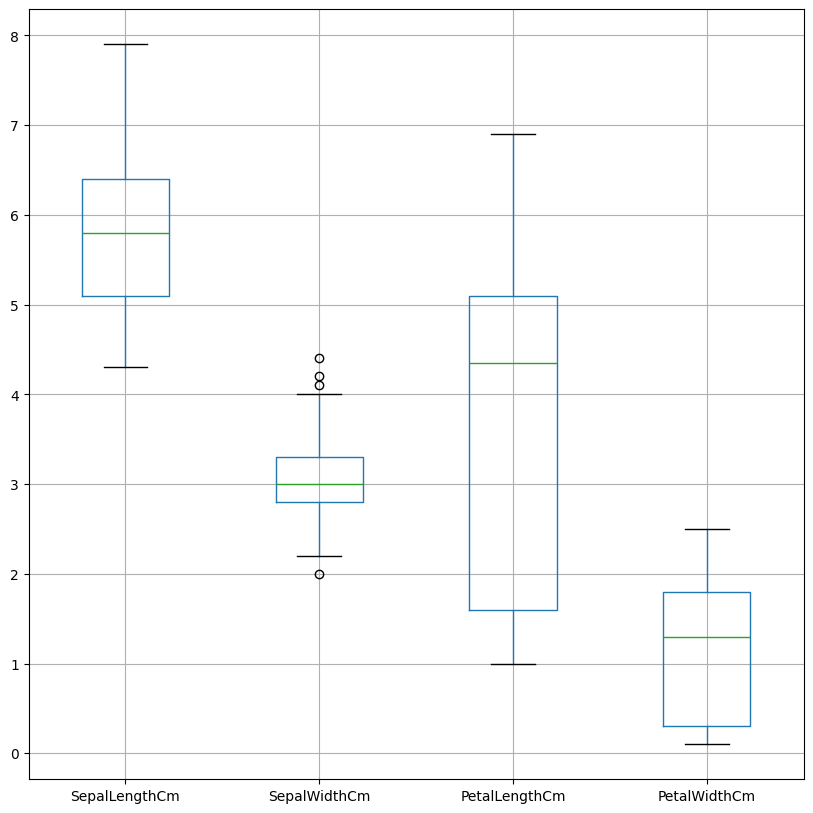

In [45]:
# View X's boxplot
X.boxplot(figsize=(10,10))
plt.show()

In [46]:
# Aykırı değerleri sınıra çek IQR ile
import pandas as pd

def iqr_cap_outliers(df, columns=None, factor=1.5):
    df_capped = df.copy()

    if columns is None:
        columns = df_capped.select_dtypes(include=['float', 'int']).columns

    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR

        df_capped[col] = df_capped[col].clip(lower, upper)

    return df_capped


In [50]:
X = iqr_cap_outliers(X,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])

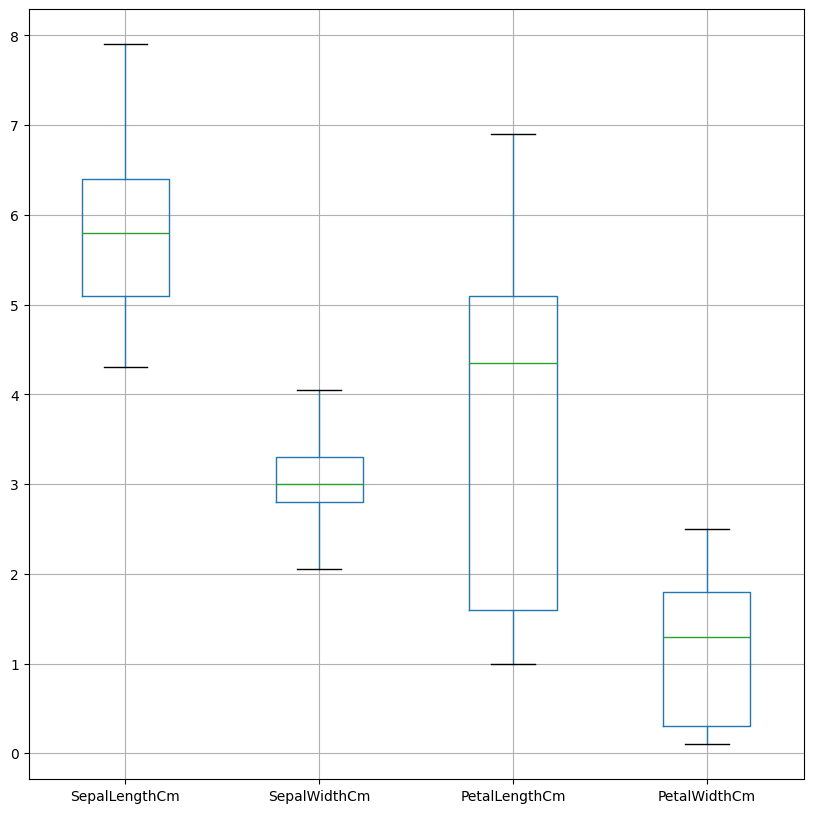

In [51]:
# View X's boxplot
X.boxplot(figsize=(10,10))
plt.show()

# Normalization

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normed = scaler.fit_transform(X)


In [53]:
X_normed

array([[-9.00681170e-01,  1.06572221e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.20170457e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.54186609e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.17008076e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.30290074e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  2.01443634e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.28543675e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.28543675e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.57348990e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.17008076e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.54007927e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.28543675e-01, -1.22754100e+00,
      

#Korelasyon

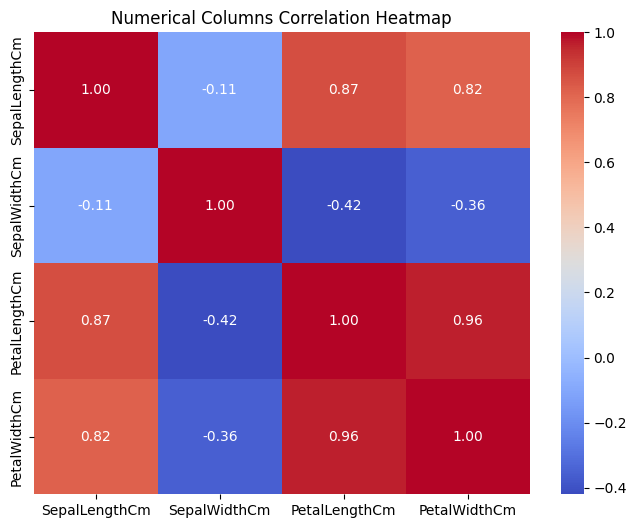

In [55]:
corr = df.select_dtypes(include=["int", "float"]).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Numerical Columns Correlation Heatmap")
plt.show()

Yüksek korelasyona sahip(Aynı bilgileri içeren özellikler var)

#Train Test Split and Train

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X_normed,y,random_state=42)

In [58]:
def train_model(X_train, X_test, y_train, y_test):
    models = [
        ("Logistic Regression", LogisticRegression(max_iter=200)),
        ("Random Forest", RandomForestClassifier()),
        ("KNN", KNeighborsClassifier()),
        ("SVM", SVC())
    ]

    for name, model in models:
        print(f"📊 Model: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("*"*60)

    return model




In [59]:
a = train_model(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

📊 Model: Logistic Regression
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Accuracy: 1.0
************************************************************
📊 Model: Random Forest
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

[[15  0  0]
 [ 0 11  0]
 [ 0  0 

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(max_iter=200), X, y, cv=5)
print("CV mean accuracy:", np.mean(scores))


CV mean accuracy: 0.9733333333333334


CV mean accuracy: 0.9733333333333334 [ Accuracy Arttı :) ]

# Korelasyon sonucuna göre Accuracy

In [62]:
X_normed = X.drop("PetalLengthCm",axis=1)

In [63]:
X_normed

,SepalLengthCm,SepalWidthCm,PetalWidthCm
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2
...,...,...,...
145,6.7,3.0,2.3
146,6.3,2.5,1.9
147,6.5,3.0,2.0
148,6.2,3.4,2.3


In [64]:
X_normed = X.drop("SepalLengthCm",axis=1)

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X_normed,y,random_state=42,test_size=0.2)

In [66]:
a = train_model(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

📊 Model: Logistic Regression
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
************************************************************
📊 Model: Random Forest
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 

CV mean accuracy: 0.9733333333333334
